#### The goal is to use the Random Forest Classification algorithm to obtain results for the different attack categories found in the KDDcup99 dataset. The results are to be displayed in the form of a plot with varying values for the depth of the decision trees. 

In [1]:
from sklearn.datasets import fetch_kddcup99
import numpy as np

# Import 10% of the entire kddcup99 dataset
kdd99_data = fetch_kddcup99()
X = kdd99_data['data']
y = kdd99_data['target']

print(X.shape)
print(y.shape)

(494021, 41)
(494021,)


In [2]:
# Remove categorical data from X
X_num_sample = np.delete(X,[1,2,3],1)
print(X_num_sample.shape)
print(y.shape)

print(X[0:100])

(494021, 38)
(494021,)
[[0 b'tcp' b'http' ... 0.0 0.0 0.0]
 [0 b'tcp' b'http' ... 0.0 0.0 0.0]
 [0 b'tcp' b'http' ... 0.0 0.0 0.0]
 ...
 [0 b'tcp' b'http' ... 0.0 0.0 0.0]
 [0 b'tcp' b'http' ... 0.0 0.0 0.0]
 [0 b'tcp' b'http' ... 0.0 0.0 0.0]]


In [3]:
# Make sure all categorical columns were removed
X_num_sample[0:1]

array([[0, 181, 5450, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8,
        8, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 9, 9, 1.0, 0.0, 0.11, 0.0,
        0.0, 0.0, 0.0, 0.0]], dtype=object)

In [4]:
print(y[0:50])

[b'normal.' b'normal.' b'normal.' b'normal.' b'normal.' b'normal.'
 b'normal.' b'normal.' b'normal.' b'normal.' b'normal.' b'normal.'
 b'normal.' b'normal.' b'normal.' b'normal.' b'normal.' b'normal.'
 b'normal.' b'normal.' b'normal.' b'normal.' b'normal.' b'normal.'
 b'normal.' b'normal.' b'normal.' b'normal.' b'normal.' b'normal.'
 b'normal.' b'normal.' b'normal.' b'normal.' b'normal.' b'normal.'
 b'normal.' b'normal.' b'normal.' b'normal.' b'normal.' b'normal.'
 b'normal.' b'normal.' b'normal.' b'normal.' b'normal.' b'normal.'
 b'normal.' b'normal.']


In [5]:
# Assign each attack type to a numerical representation of an attack category

for i in range(X.shape[0]):
  
    if(y[i]==b'normal.'):
        y[i] = 1
    
# dos
    if(y[i]==b'neptune.'or y[i]==b'smurf.'or y[i]==b'pod.' or y[i]==b'teardrop.' or y[i]==b'land.' or y[i]==b'back.'):
        y[i] = 2

# u2r
    if(y[i]==b'buffer_overflow.' or y[i]==b'loadmodule.' or y[i]==b'perl.' or y[i]==b'rootkit.'):
        y[i] = 3
    
# r2l 
    if(y[i]==b'guess_passwd.' or y[i]==b'ftp_write.' or y[i]==b'imap.' or y[i]==b'phf.' or y[i]==b'multihop.' or y[i]==b'warezmaster.' or y[i]==b'warezclient.' or y[i]==b'spy.'):
        y[i] = 4

# probe
    if(y[i]==b'portsweep.' or y[i]==b'ipsweep.' or y[i]==b'nmap.' or y[i]==b'satan.'):
        y[i] = 5

In [6]:
y = np.int64(y)
print(y[40700:40800])
print(set(y))
print(type(y))

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
{1, 2, 3, 4, 5}
<class 'numpy.ndarray'>


In [7]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_num_sample, y, test_size=0.33, random_state=42, stratify = y)

In [8]:
print(set(y_train))
print(set(y_test))

{1, 2, 3, 4, 5}
{2, 3, 4, 5}


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score

recall_scores = []
precision_scores = []
f1_scores = []


def calculations(n):
    
    clf = RandomForestClassifier(max_depth = n, random_state = 42)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    y_pred = np.array(y_pred)
    
    precision,recall,fscore,support=score(y_test,y_pred,average='macro')
    
    recall_scores.append(recall)
    precision_scores.append(precision)
    f1_scores.append(fscore)

In [10]:
ilist = []
i = 5
while i<320:
    calculations(i)
    ilist.append(i)
    i=i*2

c:\users\kajia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\kajia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\kajia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

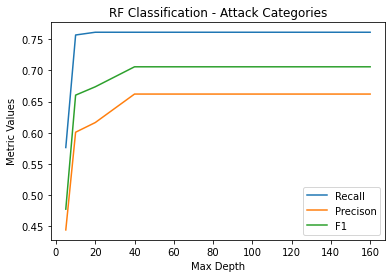

In [11]:
    import matplotlib.pyplot as plt
    plt.plot(ilist, recall_scores, label='Recall')
    plt.plot(ilist, precision_scores, label='Precison')
    plt.plot(ilist, f1_scores,label='F1')
    
    plt.xlabel('Max Depth')
    plt.ylabel('Metric Values')
    plt.title('RF Classification - Attack Categories')
    
    leg = plt.legend();

    plt.show()

In [12]:
ilist

[5, 10, 20, 40, 80, 160]